In [1]:
# Import necessary libraries
from sklearn import datasets # to retrieve the iris Dataset
import pandas as pd # to load the dataframe
from sklearn.preprocessing import StandardScaler # to standardize the features
from sklearn.decomposition import PCA # to apply PCA
import seaborn as sns # to plot the heat maps
import matplotlib.pyplot as plt
from JPM_Functions import outlier_removal, my_mae, my_mse, my_r2, my_train_test_split
from JPM_GradientBoostedTreeClasses import DecisionTree, GradientBoostAll
from sklearn.model_selection import train_test_split

In [21]:
#Upload data in dataframe
column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
df = pd.read_csv('housing.csv', sep = '\s+', header = None, names = column_names) 
df.head()

# Remove Outliers
df = outlier_removal(df, "MEDV")
print(df.info())
df.reset_index(drop=True)
# random stuff
# Split into X and y
df_x = df[['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']]
df_y = df['MEDV']
df_x.reset_index(drop=True)
df_y.reset_index(drop=True)

# Standardize Data (Very important for PCA) 
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df_x))
print(df_scaled)
df_scaled.reset_index(drop=True)

<class 'pandas.core.frame.DataFrame'>
Index: 466 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     466 non-null    float64
 1   ZN       466 non-null    float64
 2   INDUS    466 non-null    float64
 3   CHAS     466 non-null    int64  
 4   NOX      466 non-null    float64
 5   RM       466 non-null    float64
 6   AGE      466 non-null    float64
 7   DIS      466 non-null    float64
 8   RAD      466 non-null    int64  
 9   TAX      466 non-null    float64
 10  PTRATIO  466 non-null    float64
 11  B        466 non-null    float64
 12  LSTAT    466 non-null    float64
 13  MEDV     466 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 54.6 KB
None
           0         1         2         3         4         5         6   \
0   -0.435149  0.334919 -1.336816 -0.252838 -0.160527  0.686751 -0.123732   
1   -0.432601 -0.477604 -0.635435 -0.252838 -0.748894  0.419254  0.365267   
2   

<>:3: SyntaxWarning: invalid escape sequence '\s'
<>:3: SyntaxWarning: invalid escape sequence '\s'
C:\Users\EmmaBland\AppData\Local\Temp\ipykernel_8864\1583775298.py:3: SyntaxWarning: invalid escape sequence '\s'
  df = pd.read_csv('housing.csv', sep = '\s+', header = None, names = column_names)


,0,1,2,3,4,5,6,7,8,9,10,11,12
0,-0.435149,0.334919,-1.336816,-0.252838,-0.160527,0.686751,-0.123732,0.120801,-0.987089,-0.695549,-1.609553,0.451503,-1.197647
1,-0.432601,-0.477604,-0.635435,-0.252838,-0.748894,0.419254,0.365267,0.534016,-0.873232,-1.016283,-0.396584,0.451503,-0.597069
2,-0.432603,-0.477604,-0.635435,-0.252838,-0.748894,1.746319,-0.270075,0.534016,-0.873232,-1.016283,-0.396584,0.408469,-1.334799
3,-0.431986,-0.477604,-1.355972,-0.252838,-0.842692,1.421500,-0.816183,1.049935,-0.759375,-1.135074,0.040085,0.427501,-1.492162
4,-0.427533,-0.477604,-1.355972,-0.252838,-0.842692,1.680313,-0.516359,1.049935,-0.759375,-1.135074,0.040085,0.451503,-1.147118
...,...,...,...,...,...,...,...,...,...,...,...,...,...
461,-0.428312,-0.477604,0.080681,-0.252838,0.137921,0.718017,0.015472,-0.638356,-0.987089,-0.832158,1.156017,0.399588,-0.520553
462,-0.430420,-0.477604,0.080681,-0.252838,0.137921,-0.103582,0.286742,-0.728386,-0.987089,-0.832158,1.156017,0.451503,-0.605731
463,-0.428539,-0.477604,0.080681,-0.252838,0.137921,1.383286,0.797157,-0.784920,-0.987089,-0.832158,1.156017,0.451503,-1.102363
464,-0.422610,-0.477604,0.080681,-0.252838,0.137921,1.067153,0.736478,-0.680615,-0.987089,-0.832158,1.156017,0.415025,-0.981092


In [22]:
# Perform PCA
pca = PCA(n_components=3) # Init model
pca.fit(df_scaled) # Fit to model
pca_data = pca.transform(df_scaled) # Transform data
pca_data = pd.DataFrame(pca_data, columns=['PC1', 'PC2', 'PC3']) # Put into DataFrame
pca_data.head()

,PC1,PC2,PC3
0,-2.242539,-0.504099,0.770004
1,-1.574754,-0.749635,-0.231858
2,-2.235285,-0.223435,0.631763
3,-2.775341,0.170477,0.163661
4,-2.621749,0.108590,0.255466


<Axes: >

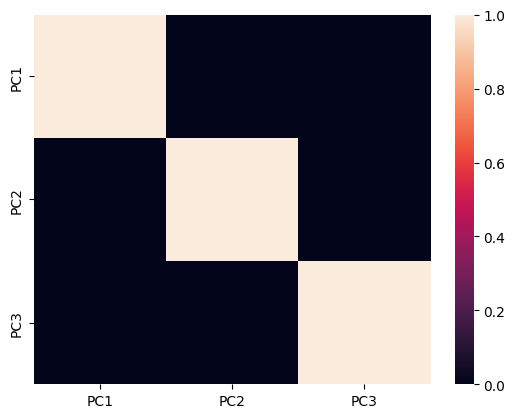

In [23]:
# Co-relation between features after PCA
sns.heatmap(pca_data.corr())

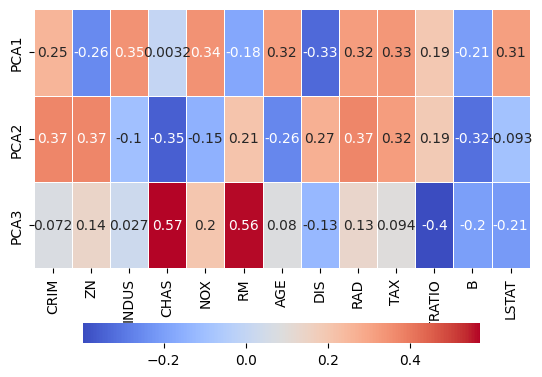

In [24]:
# Make-up of each PCA
fig, ax = plt.subplots()

ax = sns.heatmap(
    pca.components_,
    cmap = "coolwarm",
    yticklabels=[f"PCA{x}" for x in range(1,pca.n_components_+1)],
    xticklabels = list(df_x.columns),
    annot=True,
    linewidths=.5,
    cbar_kws={"shrink":.8, "orientation": 'horizontal'}
)
#ax.set_aspect("equal")
plt.show()

In [31]:
# What does this actually do for the PCA?
# Split the data
df_scaled.reset_index(drop=True)
df_y.reset_index(drop=True)
X_train, X_test, y_train, y_test = train_test_split(df_scaled,df_y,test_size=0.2, random_state=123)
X_train_np = X_train.to_numpy()
X_test_np = X_test.to_numpy()
y_train_np = y_train.to_numpy()
y_test_np = y_test.to_numpy()

# Create, Train, Fit, Model
model = GradientBoostAll(n_estimators=40, max_depth=3)
model.fit(X_train_np, y_train_np)
predictions = model.predict(X_test_np)

# Print Model Metrics
print("MSE:", my_mse(y_test, predictions))
print("MAE:", my_mae(y_test, predictions))
print("R2:", my_r2(y_test, predictions))

MSE: 5.2835775393329385
MAE: 1.691912762716353
R2: 0.864318471359151
